<a href="https://colab.research.google.com/github/jmarinme2/learning-bioinformatics-at-home/blob/master/Modulo3Capsula2_abiertaUGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

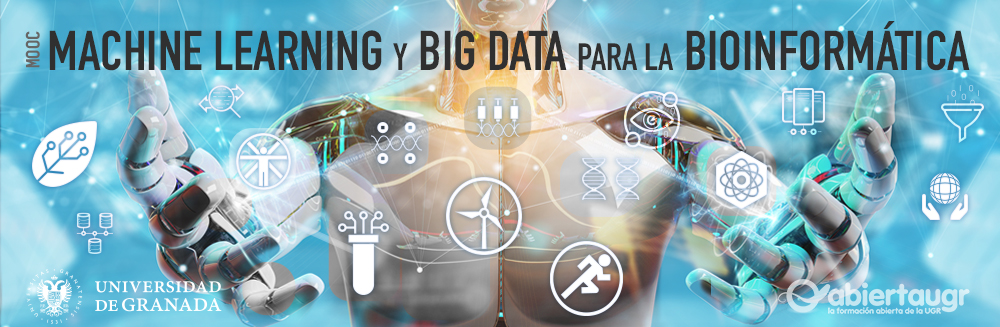
## **Módulo 3 - Ciencia de Datos y Machine Learning.** 
## **3.2 Aprendizaje Supervisado.**

**Autor**: 

*Por* Prof. Alberto Fernández Hilario

Profesor Titular de Universidad de Granada. Instituto Andaluz Interuniversitario en Data Science and Computational Intelligence (DasCI)


## Breves Instrucciones

### Recordatorio: Introducción a NoteBook

El cuaderno de *Jupyter* (Python) es un enfoque que combina bloques de texto (como éste) junto con bloques o celdas de código. La gran ventaja de este tipo de celdas, es su interactividad, ya que pueden ser ejecutadas para comprobar los resultados directamente sobre las mismas. 

**Muy importante**: el orden de las instrucciones (bloques de código) es fundamental, por lo que cada celda de este cuaderno debe ser ejecutada secuencialmente. En caso de omitir alguna, puede que el programa lance un error (se mostrará un bloque salida con un mensaje en inglés de color rojo), así que se deberá comenzar desde el principio en caso de duda. Para hacer este paso más sencillo, se puede acceder al menú “Entorno de Ejecución” y pulsar sobre “Ejecutar anteriores”. 

¡Ánimo!

Haga clic en el botón "play" en la parte izquierda de cada celda de código. Las líneas que comienzan con un hashtag (#) son comentarios y no afectan a la ejecución del programa.

También puede pinchar sobre cada celda y hacer "*ctrl+enter*" (*cmd+enter* en Mac).

Cuando se ejecute el primero de los bloques, aparecerá el siguiente mensaje: 

"*Advertencia: Este cuaderno no lo ha creado Google.*

*El creador de este cuaderno es \<autor\>@go.ugr.es. Puede que solicite acceso a tus datos almacenados en Google o que lea datos y credenciales de otras sesiones. Revisa el código fuente antes de ejecutar este cuaderno. Si tienes alguna pregunta, ponte en contacto con el creador de este cuaderno enviando un correo electrónico a \<autor\>@go.ugr.es.”*

No se preocupe, deberá confiar en el contenido del cuaderno (Notebook) y pulsar en "*Ejecutar de todos modos*". Todo el código se ejecuta en un servidor de cálculo externo y no afectará en absoluto a su equipo informático. No se pedirá ningún tipo de información o credencial, y por tanto podrá seguir con el curso de forma segura. 

Cada vez que ejecute un bloque, verá la salida justo debajo del mismo. La información suele ser siempre la relativa a la última instrucción, junto con todos los `print()` (orden para imprimir) que haya en el código.

## **ÍNDICE** 

En este *notebook*: 
1. Se retomará el concepto de Aprendizaje Supervisado y sus fundamentos.
2. Se realizará una discusión sobre cuáles son las características principales que influyen en dicho aprendizaje.
3. Se explicará la importancia de la validación de los modelos de aprendizaje.
4. Se presentarán distintas alternativas de validación. 
    
Contenidos:
1. [¿Qué es el aprendizaje supervisado?](#sec:aprendizaje)   
2. [Características de los datos que influyen en el aprendizaje](#sec:caracteristicas)   
3. [Caso de estudio complementario: Aprendizaje de cáncer de mama mediante imágenes](#sec:dataset)  
4. [Necesidad de validar los modelos de Machine Learning](#sec:val) 
5. [Bibliografía](#sec:biblio) 

## **1. ¿QUÉ ES EL APRENDIZAJE SUPERVISADO?<a id="sec:aprendizaje"></a>**

En módulos anteriores del curso, se han destacado algunos ejemplos de interés sobre el uso de Machine Learning en el campo de la bioinformática. En concreto, dentro de la Cápsula 2 del Módulo 1 (*La Bioinformática. Aplicaciones en Bio-Ciencias y Bio-Salud*), se enumeraron el desarrollo y descubrimiento de fármacos, la microbiología, minería de textos biomédicos, medicina de precisión o personalizada, entre otros. Siendo más específicos, un uso directo del Machine Learning en estos campos sería como herramienta de diagnóstico, para determinar la categoría a la que pertenece un paciente (sano o enfermo). Otra opción válida sería ajustar el nivel de dosis concreto de un medicamento, en este caso calculando un valor numérico. 

En los dos ejemplos anteriores, el objetivo es realizar una predicción del valor de una variable de salida, como el tipo de paciente, o la dosis del medicamento. Cuando el ser humano realiza esta tarea, la realiza en base a su conocimiento basado en la experiencia con otros casos similares (pacientes y medicamentos). En el caso de Machine Learning, esta experiencia se recopila a partir de instancias en un conjunto de datos, como ya se indicó en la primera cápsula de este Módulo. 

Tanto el diagnóstico de pacientes, como la estimación de la dosis de un medicamento, se encuentran dentro de lo que se denomina como “*Aprendizaje supervisado*”. De acuerdo al tipo de variable de salida del problema, las dos tareas fundamentales dentro del aprendizaje supervisado son la **clasificación** y la **regresión**. 

Se denomina clasificación cuando el objetivo es determinar la categoría de una instancia dentro de un grupo de valores fijos (el diagnóstico de pacientes). Por su parte, la regresión busca, a grandes rasgos, crear una función matemática de interpolación para una variable de tipo real (la estimación de dosis del medicamento).

<table><tr><td>
<img src="https://i.imgur.com/w0ey1JO.png" width="300" alt="Ejemplo de la tarea de clasificación"></td>
<td>
<img src="https://i.imgur.com/JZJY6tu.png" width="300" alt="Ejemplo de la tarea de regresión"></td>
</tr></table>


En ambos casos, se utilizarán las variables de entrada que definen el problema o caso de estudio. En concreto, los algoritmos de Machine Learning suelen buscar correlaciones altas entre las variables de entrada y las de salida para así construir un modelo de buena calidad. 



## **2. CARACTERÍSTICAS DE LOS DATOS QUE INFLUYEN EN EL APRENDIZAJE<a id="sec:caracteristicas"></a>**

Dentro de las tareas de aprendizaje supervisado, es decir, clasificación y regresión, el algoritmo de aprendizaje busca ajustarse lo mejor posible a los datos durante el entrenamiento. Para ello, se utilizan las variables de entrada que describen a cada instancia del problema. 

En este sentido, un tema importante a discutir es si resulta posible determinar la cantidad de datos que es óptima para realizar un correcto aprendizaje, así como la relación entre el número de instancias y el número de variables que las representan. Otra cuestión muy relevante es comprender los detalles asociados a las variables de entrada en sí mismas. Por último, se debe poner énfasis en la necesidad de datos de calidad y el sesgo en los mismos.




### **2.1 Discusión respecto al número de instancias<a id="subsec:inst"></a>**

Con respecto al volumen de información necesario para la tarea de aprendizaje supervisado, no existe una respuesta general que sea válida para todos los casos de estudio o problemas. 

Desde el punto de vista estadístico, la muestra (el conjunto de datos) será más representativa cuanto mayor sea su número. De este modo, a mayor volumen de información disponible, más casos diferentes se es capaz de cubrir, y mejor se adaptará el modelo al caso de estudio real.

Sí que es posible extraer conocimiento a partir de unos pocos datos, 50 ó 100 por dar un número aproximado. Sin embargo, existe una alta probabilidad que el modelo generado sea demasiado específico, y por tanto no sea útil para su posterior aplicación. El número correcto dependerá de la dificultad del problema a resolver, si bien una regla genérica es que el número de instancias necesario para un correcto aprendizaje debe ser al menos 10 veces el número de parámetros utilizados para configurar el algoritmo. 

Finalmente, esta la cuestión sobre si existe una ratio específica entre el número de instancias y variables que sea apropiada para realizar un aprendizaje correcto. Desafortunadamente, tampoco hay una respuesta exacta, si bien se puede reutilizar la regla genérica anterior para indicar que, en este caso, el número de instancias debe ser al menos 10 veces el número de variables de entrada utilizadas. 



### **2.2 Discusión sobre las variables de entrada<a id="subsec:vars"></a>**

Tal como se indicó anteriormente, los algoritmos de aprendizaje automático suelen buscar correlaciones altas entre las variables de entrada y las de salida. 

La mayor parte de algoritmos de Machine Learning tienen cierta preferencia sobre las variables de entrada de tipo numérico (valores reales como el nivel de expresión genética, o el ph de un producto), si bien se pueden utilizar también variables de tipo nominal (categorías como color  o género). 

Lo único importante en este caso es tener cuidado con incluir variables que puedan desvirtuar el conocimiento que se desea extraer. Por ejemplo, podría existir una relación fuerte entre la edad de una persona y el tiempo de supervivencia a una enfermedad concreta, pero nuestro objetivo es que esa asociación la encontremos directamente en los valores genéticos. Este tipo de variables se conocen como "**confounding**" y causan asociaciones de tipo espúreas que deben ser identificadas y evitadas a toda costa, especialmente cuando se trabaja en el área de la bioinformática. 

Otro tema relevante con respecto a las variables se define como "la maldición de dimensionalidad". El término dimensionalidad se refiere la cardinalidad (número de elementos) del conjunto de variables. En los problemas de tipo bioinformático, el número de variables utilizadas para el estudio suele ser de miles o incluso decenas de miles. Este hecho dificulta muchísimo la tarea de aprendizaje, ya que se disminuye la capacidad del algoritmo de encontrar una correlación óptima entre las entradas y la salida. 

Por este motivo, resulta imprescindible dedicar un esfuerzo considerable en la fase de preparación de los datos, seleccionando exclusivamente aquellas variables que sean más importantes para el estudio. En efecto, se suele comprobar que un modelo construido sobre un subconjunto de variables predictivas de calidad siempre es mejor que aquél generado utilizando todas las variables originales. 



### **2.3 Discusión respecto al sesgo en los datos<a id="subsec:data"></a>**

Debe recordarse que en todo caso es muy importante establecer la calidad de los datos, **evitando sesgos** en los mismos. Justamente, un problema relativo al sesgo de datos se refiere a las "*counfounding variables*", ya que pueden vincular la salida del modelo a variables de entrada que no aportan información realista, o incluso con ciertos problemas éticos, como puedan ser el género, raza, o actividad laboral en un caso de estudio de detección de cáncer. 

Otro caso muy claro es el *desequilibrio* en la distribución de la variable de salida, donde se encuentran casos (clases) o rangos de valores que aparecen con una probabilidad a priori más alta que otros. Puesto que el aprendizaje busca crear un modelo que represente de forma mayoritaria al conjunto de datos, éste tendrá una preferencia por las instancias más comunes, posiblemente ignorando los casos excepcionales. El ejemplo clásico es justamente el de diagnóstico médico, donde si tomamos como referencia el alto porcentaje de casos "sanos", el modelo podría extraer la conclusión errónea que todos los pacientes están sanos (al 99% de acierto!).  

Existen métodos específicos de preprocesamiento y/o aprendizaje que están diseñados para reducir el efecto negativo del desequilibro de datos, conocido en la literatura como "*Learning from imbalanced data*". Sin embargo, al ser un tema de trabajo muy especializado, no será objeto de estudio del presente curso.

## **3. CASO DE ESTUDIO COMPLEMENTARIO: APRENDIZAJE DE CÁNCER DE MAMA MEDIANTE IMÁGENES<a id="sec:dataset"></a>**

A lo largo de este curso, se trabajará sobre un problema de aprendizaje relativo al **melanoma cutáneo**. Sin embargo, en este apartado en concreto, por cuestión de simplicidad, vamos a realizar algunas pruebas iniciales utilizando como base un conjunto de datos relativamente sencillo, conocido como *breast cancer.* 

Las variables de entrada de este conjunto se calcularon a partir de una imagen digitalizada de un aspirado de aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen en un espacio tridimensional.

Es un conjunto de datos pequeño y muy conocido en la literatura, así como disponible en muchos de las herramientas de Machine Learning, como *Scikit-Learn*. 

Para utilizar este conjunto de datos, se procede a mostrar el código que permite guardar los datos en las variables de Python de una manera sencilla. Observe bien la estructura del bloque de código, que será descrita con detalle justo a continuación.

In [ ]:
import pandas as pd
#Scikit-learn contiene su propio repositorio de datos
from sklearn.datasets import load_breast_cancer 

data = load_breast_cancer()
#guardamos la entrada (características/variables) y salida (clase) en dos variables X e y
X, y = data.data, data.target 
#Transformamos las variables a de tipo numpy a tipo DataFrame (por comodidad de uso)
X = pd.DataFrame(X,columns = data.feature_names) 
y = pd.DataFrame(y,columns=["label"]) 

#Observamos las cinco primeras muestras
X.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


A partir del código anterior, se puede extraer la siguiente información:
- `X` e `y` son dos estructuras de datos tipo `dataframe` (marco de datos) que son almacenadas en tipo `Pandas` (*biblioteca muy usada en Python*). Un `dataframe` se entiende como un vector n-dimensional, resultando en general mucho más cómodo trabajar con este tipo de estructura de datos que con `numpy`.  
- `X` contiene la matriz de datos de entrada e `y` es un vector unidimensional con la etiqueta de cada muestra en `X`. Por simplicidad, en este caso se ha optado por resolver un problema de clasificación (variable de salida de tipo categórica). 
- En el aprendizaje de tipo supervisado, `X` e `y` se usarán para construir el modelo de Machine Learning y probarlo.


## **4. NECESIDAD DE VALIDAR LOS MODELOS DE MACHINE LEARNING<a id="sec:val"></a>**
Tal como se indicó anteriormente, el procedimiento de entrenamiento en aprendizaje supervisado busca crear un modelo que se ajuste perfectamente a los datos que se dan como entrada. Para controlar si se realiza bien dicho ajuste, el algoritmo de construcción del modelo utiliza lo que se conoce como "*métrica de rendimiento*". Ésta determinará el error que se comete al realizar una predicción sobre las instancias del conjunto de entrenamiento con el modelo que se está generando.

Una vez concluido el aprendizaje, resulta de vital importancia realizar un proceso de validación del modelo. Esto significa determinar la calidad que mostrará el modelo cuando se ponga en funcionamiento sobre nuevos datos reales. Por este motivo, se utiliza el llamado “conjunto de test”, que deberá contener instancias nuevas que no se hayan utilizado durante la fase de entrenamiento. 

De acuerdo a lo anterior, en aprendizaje supervisado existen de dos fases muy bien diferenciadas que son el **entrenamiento** (*train*) y la **validación** (*test*). Es necesario insistir que se deben utilizar dos conjuntos de datos totalmente independientes puesto que, de utilizar algún ejemplo de test durante el entrenamiento, se estará sobre-estimando la calidad del modelo generado.

En la siguiente imagen se puede observar cómo se divide el conjunto de datos de entrada en dos grupos distintos, donde cada ejemplo está marcado con un color diferente si está dentro de "entrenamiento" (azul) o de "test" (naranja).

<img src="https://i.imgur.com/rtHFFae.jpg" width="400" alt="Ejemplo de división de un problema en entrenamiento y test">

### **4.1 Casos de estudio en validación<a id="subsec:val"></a>**

A partir de los resultados de predicción obtenidos en entrenamiento y test, se calcula una métrica de rendimiento en cada conjunto. En este momento, se pueden dar varios escenarios posibles:
- Se obtiene una *alta calidad* de las métricas de rendimiento tanto en entrenamiento como test: el modelo es totalmente efectivo y se ha concluido el proceso. 

<img src="https://i.imgur.com/yEOSo8S.jpg" width="400" alt="Ejemplo de buen modelado">

- Se obtiene una *alta calidad* para entrenamiento, pero *muy baja* en test: se ha caido en el sobre-aprendizaje (*over-fitting*), es decir, se ha construido un modelo tan específico para los datos de entrenamiento, que luego es incapaz de generalizar bien con datos diferentes (test). 

<img src="https://i.imgur.com/yzKYZmm.jpg" width="400" alt="Ejemplo de overfitting">

- Se obtiene una *baja calidad* tanto en entrenamiento como en test (*under-fitting*): el modelo no es bueno y se debe actuar mediante preprocesamiento, un ajuste adecuado de parámetros, o sencillamente alimentando al sistema con un mayor número de datos.

<img src="https://i.imgur.com/ObrYTs5.jpg" width="400" alt="Ejemplo de underfitting">

### **4.2 Tipos de técnicas de validación<a id="subsec:tecnicas"></a>**

Para dividir nuestro conjunto de datos original en los conjuntos de entrenamiento y test, existen tres metodologías diferentes: 

- La más sencilla es la de retención o "**hold-out**", donde los datos originales se dividen en dos conjuntos disjuntos complementarios. Por ejemplo, un 60% de instancias iniciales para entrenamiento y el 40% restante para test.
- La más utilizada por su validez estadística es la validación cruzada de *k* particiones o "**k-fold cross validation**", donde se divide el conjunto original en *k* partes disjuntas. Por ejemplo, se separan las instancias en 5 grupos sin reemplazamiento.  
- Existe la posibilidad de hacer una experimentación exhaustiva con "dejar uno fuera" o "**leave one out validation (LOOV)**". En este caso se utiliza todo el conjunto para entrenar, salvo un ejemplo para test. 

En lo sucesivo, se explicarán con más detalle las principales de estas técnicas, poniendo especial atención a la más recomendada de todas: *la validación cruzada de k particiones*. La razón fundamental es que se emplean todas las instancias del conjunto de datos en las diferentes particiones de test, promoviendo un mayor rigor estadístico, y por tanto validez de los resultados obtenidos. 



### **4.3 Validación Hold-out<a id="subsec:holdout"></a>**

Tal como se introdujo anteriormente, “**hold-out**” crea dos conjuntos simples, es decir, un fichero de entrenamiento y otro de test, mediante una partición en un porcentaje determinado de los datos. El porcentaje seleccionado para cada subconjunto queda a disposición del usuario, si bien valores típicos suelen estar por encima del 60, 75 u 80% para entrenamiento, y el resto para test. 

La ventaja del método “**hold-out**” es que es muy sencillo y eficiente de realizar. Sin embargo, este método no es recomendable puesto que la calidad final del modelo dependerá en gran medida de cómo se hayan dividido los datos. En otras palabras, al separar las instancias de manera totalmente aleatoria podría darse el caso que todas las instancias seleccionadas para test sean las más difíciles de identificar. 

Se utilizará por tanto **hold-out** cuando se realicen pruebas iniciales para conocer el comportamiento base de los diferentes modelos (algoritmos de Machine Learning) aplicados al problema bajo estudio. 

A continuación, se va a conocer el código para crear las particiones de datos, donde todas las instrucciones están debidamente comentadas para entender su función concreta. El parámetro principal utilizado en este caso será el `ratio` para definir la división entre el conjunto de *test* y *entrenamiento* respectivamente. 

Se recuerdan inicialmente algunos detalles sobre el código fuente mostrado:

- Como apoyo en todo el curso se utilizará la biblioteca [Scikit-learn](https://scikit-learn.org/) por lo que se importará toda la funcionalidad y módulos del mismo en las primeras líneas del código
- El particionamiento de datos se realiza por defecto de manera aleatoria. Por este motivo, se debe utilizar lo que se conoce como "semilla". Éste es un valor fijo que permite generar siempre los mismos resultados cada vez que se ejecute el código con dicha semilla indicada en el parámetro ```random_state```.
- Siempre se utilizará como última instrucción un ```print()``` para mostrar un resultado que permita interpretar todo el proceso.

In [ ]:
#se carga el codigo necesario para hacer "hold-out"
from sklearn.model_selection import train_test_split 

#Parámetros usados:
rd = 42 #al ser un proceso no determinista, se fija una semilla
ratio = 0.2  #El parámetro más importante: cuál es el ratio usado para entrenamiento y test

#A continuación se hace la división. Importante: se divide la entrada y salida (X e y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio,random_state=rd) 

#Se imprimen los índices de train y test con respecto al conjunto original
print("%s %s" % (X_train.index, X_test.index))


Int64Index([ 68, 181,  63, 248,  60,  15, 290, 137, 155, 517,
            ...
            330, 214, 466, 121,  20,  71, 106, 270, 435, 102],
           dtype='int64', length=455) Int64Index([204,  70, 131, 431, 540, 567, 369,  29,  81, 477,
            ...
            549, 530, 163, 503, 148, 486,  75, 249, 238, 265],
           dtype='int64', length=114)


Los siguientes fragmentos de código muestran el tamaño de los conjuntos que se acaban de crear

In [ ]:
#Primero train (X e y)
X_train.shape, y_train.shape

((455, 30), (455, 1))

In [ ]:
#Luego test (x e y)
X_test.shape, y_test.shape

((114, 30), (114, 1))

En los resultaod anteriores se puede observer que, al realizar una división en 80%-20% (se aplicó un ```ratio = 0.2``` para test) se tienen 455 instancias en entrenamiento ($569 \cdot 0.8$) y 114 para test ($569 \cdot 0.2$). 

Es extremadamente importante que ambos conjuntos sean disjuntos, es decir, que ningún ejemplo de test se haya visto durante el entrenamiento, para poder realizar correctamente la validación. Este hecho se comprueba en el siguiente bloque de código, donde se "pregunta" si algún dato (instancia) del conjunto de entrenamiento (`X_train`) está contenido en el de test (`X_test`). El resultado deberá ser siempre ```False``` para todas las filas. 

In [ ]:
X_train.isin(X_test) #Instrucción que comprueba si algún elemento de test se repite en train

#La primera columna que se observa es el índice original, que está desordenado

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
270,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### **4.4 Validación cruzada de k particiones<a id="subsec:kfold"></a>**

Esta aproximación es la más utilizada y recomendada cuando se realiza aprendizaje supervisado. El motivo principal es su rigor estadístico, así como el uso de la totalidad del conjunto de datos para entrenamiento y test, utilizando para ello un procedimiento iterativo, es decir, que se repitirá un número determinado de veces. 

En concreto, cuando se utiliza una validación cruzada de k particiones se dividen los datos en k subconjuntos disjuntos, llamadas particiones. El objetivo, como se ha indicado anteriormente, es el de proceder a validar los modelos con diferentes combinaciones de dichas particiones. En concreto, las instancias pertenecientes a cada una de las *k* particiones se almacenerán en un conjunto diferente de test; mientras que la unión de las instancias que se encuentren en las *k-1* particiones restantes, se utilizarán para construir cada uno de los conjuntos de entrenamiento.

Como ejemplo, si se realiza una validación cruzada con 5 particiones (k=5), los datos se repartirían como se muestra en el esquema de la siguiente figura. Como se puede observar, para cada partición tomamos 1/5 de prueba, y los 4/5 restantes de entrenamiento.

![Ejemplo de validación cruzada de 5 particiones](https://i.imgur.com/NAgX78H.png)


A continuación, se indica cómo se puede realizar esta división de datos mediante Python, de nuevo aprovechando la funcionalidad de la biblioteca  **Scikit-Learn**. 

La principal diferencia del siguiente código con respecto al utilizado para *hold-out* reside en lo siguiente: en este caso, en lugar de generar directamente dos nuevas variables `train` y `test`, se calculan a priori los índices (posiciones) de las instancias que pertenecen a cada partición de test. Posteriormente, se utilizará una estructura repetitiva (bucle `for`) para generar las particiones realizando una búsqueda por índice (utilizando una función denominada `iloc`) sobre el conjunto original de entrada (`X`) y de salida (```y```). 

La salida del ejemplo de código fuente mostrará, en cada línea, dos listas de índices (entre corchetes [ ]) representando las instancias seleccionadas para entrenamiento y test, respectivamente.

In [ ]:
from sklearn.model_selection import KFold #cargamos las funciones necesarias

#Parámetros
rd = 42
particiones = 5

#Primera diferencia con hold-out, se crean a priori los índices de las particiones
kf = KFold(n_splits=particiones,shuffle=True,random_state=rd)

#A continuación se realiza cada subdivisión. 
#Notar que es necesario hacerlo iterativo (bucle for) para cada partición
for train, test in kf.split(X,y):
  print("%s %s" % (train, test))
  #Se crean los conjuntos iterativamente (iloc es una función de "búsqueda")
  X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]


[  0   1   3   4   5   7   8  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  31  32  33  34  35  36  37  38  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  71  74  80  85  87  88  89  91  92  93  94
  95  96  97  98  99 100 102 103 105 106 107 108 111 112 113 114 115 116
 117 119 120 121 122 123 124 125 126 127 128 129 130 133 134 135 136 137
 138 139 141 142 143 146 147 149 150 151 152 154 155 156 157 159 160 161
 162 164 166 168 169 170 171 172 173 174 175 176 178 179 180 181 183 184
 185 186 187 189 190 191 192 193 194 195 197 198 199 200 201 202 205 206
 207 209 210 212 213 214 215 216 217 218 219 220 221 223 224 225 226 227
 229 230 231 232 233 234 236 237 239 240 241 242 243 244 245 246 247 248
 251 252 253 254 256 258 259 260 261 262 263 266 267 268 269 270 272 273
 276 277 278 279 280 282 283 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 306 307 308 30

Tal como se indicó, la salida que debería mostrarse arriba son los índices de las diferentes instancias en entrenamiento y test. Es importante observar que para test no coinciden los números en ninguno de los 5 casos. 

![Divisón 5 fold cross validation](https://i.picasion.com/pic90/b4ecf165491da3986586d93ec996f8dd.gif)

Además de lo anterior, es muy común repetir el proceso de particionamiento (división) en k-conjuntos un número determinado de veces para añadir mayor rigor estadístico a los resultados obtenidos. Esto significa que, como en el caso de *hold-out* el objetivo es eliminar la dependencia del proceso de división aleatoria, que puede provocar que las instancias de test más difíciles siempre caigan en el mismo conjunto.

Este procedimiento descrito en el párrafo anterior se denomina como *repeated k-fold* y se muestra en el siguiente ejemplo de código:

In [ ]:
from sklearn.model_selection import RepeatedKFold

#Parámetros
rd = 42
particiones = 5
repeticiones = 3

#Muy similar al anterior, pero incluyendo un parámetro adicional de repeticiones
rkf = RepeatedKFold(n_splits=particiones, n_repeats=repeticiones, random_state=rd)
for index, (train, test) in enumerate(rkf.split(X,y)):
  if index % particiones == 0:
    print("Repetición ",(index // particiones)+1)
  print("%s %s" % (train, test))
  X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]

Repetición  1
[  0   1   3   4   5   7   8  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  31  32  33  34  35  36  37  38  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  71  74  80  85  87  88  89  91  92  93  94
  95  96  97  98  99 100 102 103 105 106 107 108 111 112 113 114 115 116
 117 119 120 121 122 123 124 125 126 127 128 129 130 133 134 135 136 137
 138 139 141 142 143 146 147 149 150 151 152 154 155 156 157 159 160 161
 162 164 166 168 169 170 171 172 173 174 175 176 178 179 180 181 183 184
 185 186 187 189 190 191 192 193 194 195 197 198 199 200 201 202 205 206
 207 209 210 212 213 214 215 216 217 218 219 220 221 223 224 225 226 227
 229 230 231 232 233 234 236 237 239 240 241 242 243 244 245 246 247 248
 251 252 253 254 256 258 259 260 261 262 263 266 267 268 269 270 272 273
 276 277 278 279 280 282 283 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 

**Nota importante:** El número total de particiones y / o iteraciones no se puede estimar a priori y dependerá principalmente del número de instancias de que dispongamos. El caso más común es utilizar 10 particiones por defecto y 3 repeticiones. Sin embargo, en caso de pocas instancias se puede bajar a 5 particiones y 3 ó 5 repeticiones.

### **4.5 Validación cruzada estratificada (solo clasificación)<a id="sfcv"></a>**

Esta alternativa es una variación muy adecuada para clasificación del *k-fold* que devuelve particiones de tipo estratificadas. Este término significa que cada conjunto contiene aproximadamente el mismo porcentaje de muestras de cada clase objetivo que el conjunto completo.

Esto resulta imprescindible para evitar el posible sesgo en los modelos y obtener una conclusiones equívocas. Es especialmente relevante cuando se trabaja con datos no balanceados, es decir, con un porcentaje muy pequeño de muestras de una de las clases. 

Tal como se indicó al comienzo de esta actividad, este caso de estudio se observa con frecuencia en problemas del contexto de biología y/o salud. 

En el siguiente ejemplo, se implementa la solución utilizando esta nueva versión mejorada de *k-fold*. El formato de llamada es prácticamente equivalente al caso anterior de validación cruzada. 

Para entender las diferencias en su comportamiento, se realiza una comparativa entre ambos esquemas de particionamiento, comprobando la distribución final de ejemplos que hay en cada clase. Para ello se utiliza una instrucción de `numpy` llamada ```bincount``` que simplemente cuenta el número de ocurrencias de cada valor dentro de la lista.

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np

#Parámetros
rd = 42
particiones = 5

#Realizamos partición estratificada
skf = StratifiedKFold(n_splits=particiones,shuffle=True,random_state=rd)

#Vamos a chequear las diferencias con KFold
kf = KFold(n_splits=particiones,shuffle=True,random_state=rd)

#A continuación hacemos cada subdivisión. 
print("Comprobar distribución de clases en SKF:")
for train, test in skf.split(X,y):
  X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
  print('train -  {}   |   test -  {}'.format(np.bincount(y_train.iloc[:,0]), np.bincount(y_test.iloc[:,0])))

print("\nComprobar distribución de clases en KF:")
for train, test in kf.split(X, y):
  X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
  print('train -  {}   |   test -  {}'.format(np.bincount(y_train.iloc[:,0]), np.bincount(y_test.iloc[:,0])))

Comprobar distribución de clases en SKF:
train -  [169 286]   |   test -  [43 71]
train -  [169 286]   |   test -  [43 71]
train -  [170 285]   |   test -  [42 72]
train -  [170 285]   |   test -  [42 72]
train -  [170 286]   |   test -  [42 71]

Comprobar distribución de clases en KF:
train -  [169 286]   |   test -  [43 71]
train -  [175 280]   |   test -  [37 77]
train -  [169 286]   |   test -  [43 71]
train -  [169 286]   |   test -  [43 71]
train -  [166 290]   |   test -  [46 67]


En el ejemplo anterior se ha mostrado la distribución de instancias en las dos clases para las particiones de test. A pesar que el conjunto de datos de *breast cancer* no presenta un alto desequilibrio de clases, sí que se ha observado que se puede crear sin quererlo un sesgo hacia alguna de las mismas (por ejemplo en la segunda de las particiones).

## **REFERENCIAS BIBLIOGRÁFICAS**

-	Han, J., Kamber, M., Pei, J. (2011). Data Mining: Concepts and Techniques. San Francisco, CA, USA: Morgan Kaufmann Publishers. ISBN: 0123814790, 9780123814791
- Hastie, T., Tibshirani, R., Friedman, J. H. (2001). The Elements of Statistical Learning. Springer Verlag.
-	Witten, I. H., Frank, E., Hall, M. A., Pal, C. J. (2017). Data mining: practical machine learning tools and techniques. Amsterdam; London: Morgan Kaufmann. ISBN: 9780128042915 0128042915
- Scikit-Learn: Cross-validation: evaluating estimator performance https://scikit-learn.org/stable/modules/cross_validation.html (visitado el 25 de Junio de 2020)

### **Referencias adicionales**

-	Alpaydin, E. (2016). Machine Learning: The New AI. MIT Press. ISBN: 9780262529518
- Fernández Hilario, A., García López, S., Galar, M., Prati, R.C., Krawczyk, B., Herrera, F. (2018) Learning from Imbalanced Data Sets. Springer. ISBN: 978-3-319-98074-4, doi: 10.1007/978-3-319-98074-4
- James, G., Witten, D., Hastie, T., Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112). Springer.
- Kohavi, R. (1995). A Study of Cross-Validation and Bootstrap for Accuracy Estimation nd Model Selection. Proceedings of the International Joint Conference on Artificial Intelligence IJCAI), 1995 (p./pp. 1137--1145).
- Molnar, C. (2020). Interpretable Machine Learning A Guide for Making Black Box Models Explainable. https://christophm.github.io/interpretable-ml-book/ (consultado el 30 de Abril de 2020)
- Rao, R. B. & Fung, G. (2008). On the Dangers of Cross-Validation. An Experimental Evaluation. SDM (p./pp. 588-596), : SIAM. ISBN: 978-1-61197-278-8



<div class="alert alert-block alert-success">
MOOC Machine Learning y Big Data para la Bioinformática (1ª edición)   

http://abierta.ugr.es         
</div>    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')